In [ ]:
#Harmony Integration - Imm

In [2]:
library(Seurat)
library(harmony)
library(ggplot2)
library(openxlsx)
library(readxl)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#Load datasets
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Subsets")
load("data_adams_imm.RData")
load("data_haber_imm.RData")
load("data_reyf_imm.RData")
load("data_rama_imm.RData")
load("data_fons_imm.RData")
load("data_kuppe_imm.RData")
load("data_panc_imm.RData")
load("data_deng_imm.RData")

In [3]:
#Clean up reductions
data_kuppe_seurat_imm@reductions$pca <- NULL
data_kuppe_seurat_imm@reductions$harmony <- NULL
data_kuppe_seurat_imm@reductions$umap.harmony <- NULL
data_kuppe_seurat_imm@reductions$umap.unint <- NULL
data_panc_imm@reductions$pca <- NULL
data_panc_imm@reductions$harmony <- NULL
data_panc_imm@reductions$umap.harmony <- NULL
data_adams_seurat_imm@reductions$pca <- NULL
data_adams_seurat_imm@reductions$harmony <- NULL
data_adams_seurat_imm@reductions$umap.harmony <- NULL

In [5]:
data_panc_imm$study <- "Panc"

In [4]:
#Rename cells
data_adams_seurat_imm <- RenameCells(data_adams_seurat_imm, new.names = paste0(colnames(data_adams_seurat_imm), "_adams"))
data_haber_seurat_imm <- RenameCells(data_haber_seurat_imm, new.names = paste0(colnames(data_haber_seurat_imm), "_haber"))
data_reyf_seurat_imm <- RenameCells(data_reyf_seurat_imm, new.names = paste0(colnames(data_reyf_seurat_imm), "_reyf"))
data_rama_seurat_imm <- RenameCells(data_rama_seurat_imm, new.names = paste0(colnames(data_rama_seurat_imm), "_rama"))
data_fons_imm <- RenameCells(data_fons_imm, new.names = paste0(colnames(data_fons_imm), "_fons"))
data_kuppe_seurat_imm <- RenameCells(data_kuppe_seurat_imm, new.names = paste0(colnames(data_kuppe_seurat_imm), "_kuppe"))
data_panc_imm <- RenameCells(data_panc_imm, new.names = paste0(colnames(data_panc_imm), "_panc"))
data_deng_imm <- RenameCells(data_deng_imm, new.names = paste0(colnames(data_deng_imm), "_deng"))

In [5]:
#Merge datasets
data_merged_imm <- merge(data_adams_seurat_imm, c(data_haber_seurat_imm, data_reyf_seurat_imm,
                                         data_rama_seurat_imm,  data_fons_imm, 
                                          data_kuppe_seurat_imm,  data_panc_imm, 
                                           data_deng_imm))

In [6]:
#Delete unwanted datasets
data_kuppe_seurat_imm <- NULL
data_adams_seurat_imm <- NULL
data_deng_imm <- NULL
data_fons_imm <- NULL
data_haber_seurat_imm <- NULL
data_panc_imm <- NULL
data_rama_seurat_imm <- NULL
data_reyf_seurat_imm <- NULL

In [7]:
#Remove unwanted layers from merged dataset
data_merged_imm@assays$RNA@layers$data.1 <- NULL
data_merged_imm@assays$RNA@layers$data.4 <- NULL
data_merged_imm@assays$RNA@layers$data.5 <- NULL
data_merged_imm@assays$RNA@layers$data.6 <- NULL
data_merged_imm@assays$RNA@layers$data.7 <- NULL
data_merged_imm@assays$RNA@layers$scale.data.1 <- NULL
data_merged_imm@assays$RNA@layers$scale.data.4<- NULL
data_merged_imm@assays$RNA@layers$scale.data.5 <- NULL
data_merged_imm@assays$RNA@layers$scale.data.6<- NULL
data_merged_imm@assays$RNA@layers$scale.data.7 <- NULL
data_merged_imm$`RNA_snn_res.0.8` <- NULL

In [9]:
#Preparation prior to integration - timed
start.time <- Sys.time()

data_merged_imm <- NormalizeData(data_merged_imm)


data_merged_imm <- FindVariableFeatures(data_merged_imm, selection.method = "vst", nfeatures = 2000)


data_merged_imm <- ScaleData(data_merged_imm,verbose = FALSE)

data_merged_imm <- RunPCA(data_merged_imm, features = VariableFeatures(object = data_merged_imm), npcs = 50)

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

PC_ 1 
Positive:  FTL, CTSB, PSAP, GRN, HLA-DRA, GLUL, NPC2, TYROBP, CST3, APOC1 
	   FCER1G, C1QA, MARCO, HLA-DRB1, SLC11A1, MRC1, C1QB, CTSS, SPI1, CTSZ 
	   S100A11, CD74, ACP5, OLR1, CSTB, ASAH1, LGALS3, C1QC, SERPINA1, ANXA5 
Negative:  CCL5, IL32, GZMA, CD69, NKG7, CD3D, CD2, CST7, CD3E, KLRB1 
	   TRBC2, CD7, ETS1, CXCR4, TRAC, CD247, TRBC1, ISG20, GZMM, CTSW 
	   GZMK, FYN, RUNX3, CCL4, CD

Time difference of 11.21 mins

In [10]:
data_merged_imm$study <- as.factor(data_merged_imm$study) #confounder needs to be factor

In [11]:
#Harmony integration - timed
start.time <- Sys.time()


data_merged_imm <- RunHarmony(data_merged_imm, 
                        group.by.vars = "study",
                        reduction = "pca",
                        verbose = TRUE,
                        reduction.save = "harmony",
                        assay.use = "RNA")

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 23493550)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations



Time difference of 10.93 mins

In [12]:
#UMAP reduction
data_merged_imm <- FindNeighbors(data_merged_imm, dims = 1:20, reduction = "harmony")
data_merged_imm <- FindClusters(data_merged_imm, resolution = 0.2)
data_merged_imm <- RunUMAP(data_merged_imm, reduction = "harmony", dims = 1:20, reduction.name = "umap.harmony")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 469871
Number of edges: 11617884

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9467
Number of communities: 14
Elapsed time: 337 seconds


2 singletons identified. 12 final clusters.



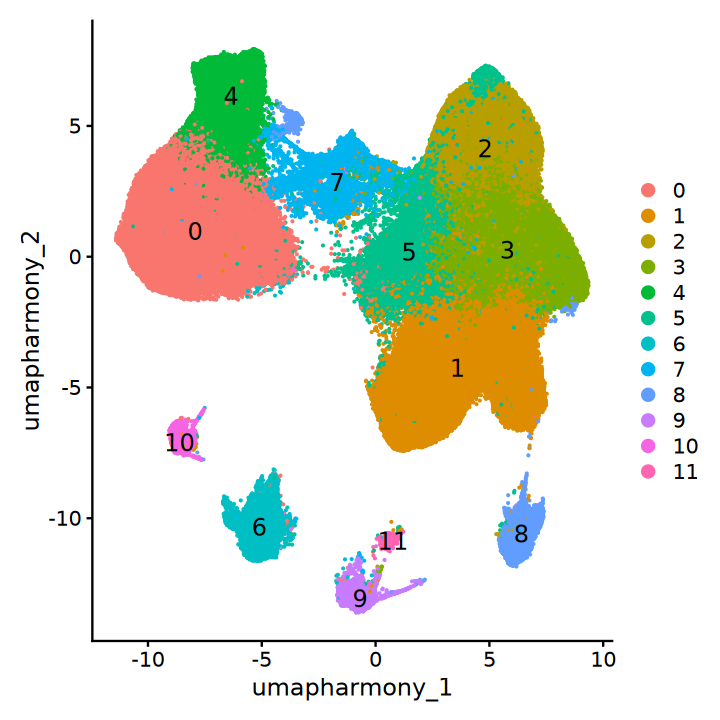

In [14]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(data_merged_imm, reduction = "umap.harmony", label = TRUE, pt.size = 0.1, label.size = 5, raster = FALSE)

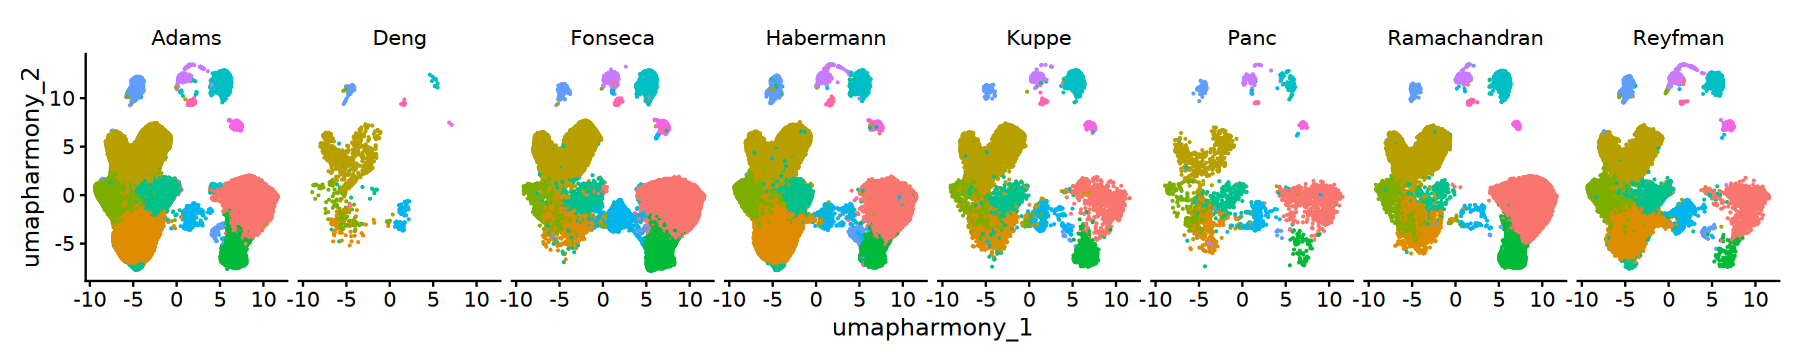

In [22]:
options(repr.plot.width=15, repr.plot.height=3)
DimPlot(data_merged_imm, reduction = "umap.harmony", split.by = "study", label = FALSE, pt.size = 0.1, label.size = 5, raster = FALSE) + NoLegend()

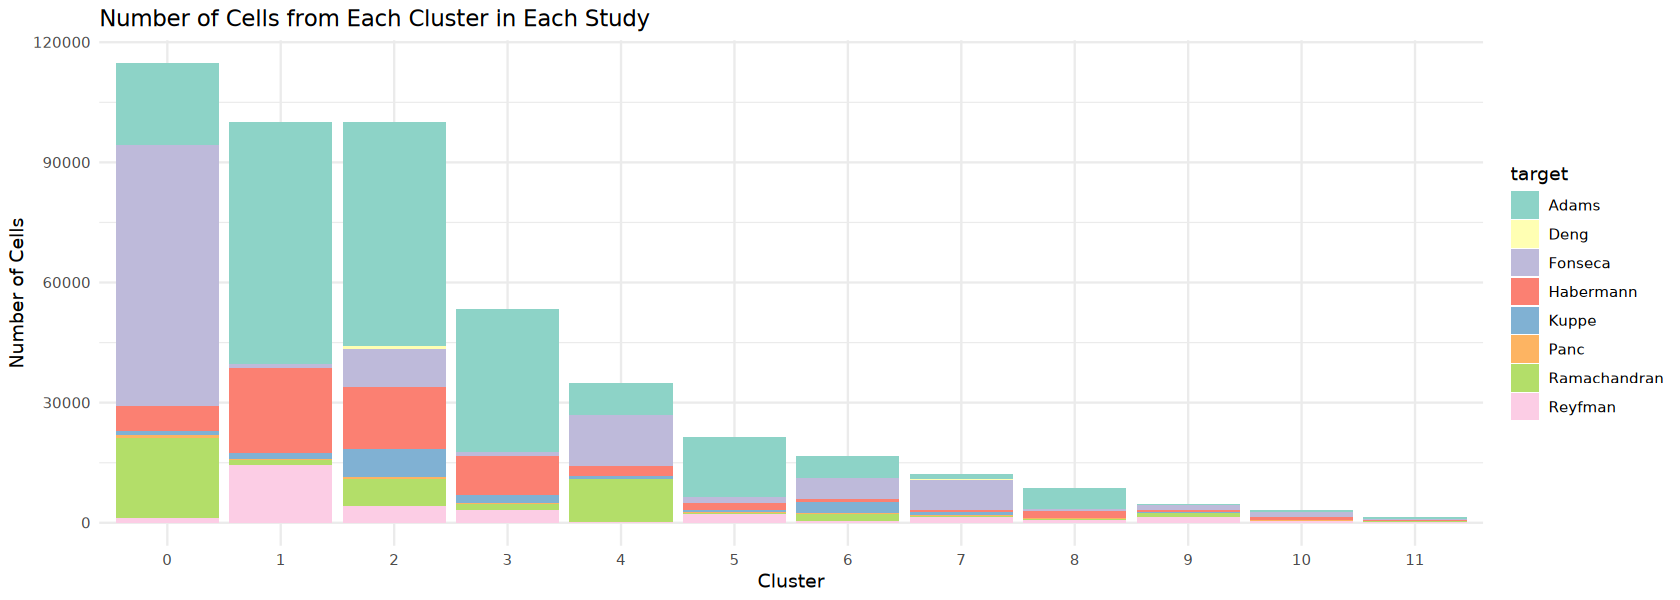

In [15]:
#Plot dataset contribution in each cluster
contingency_table <- table(data_merged_imm$`RNA_snn_res.0.2`, data_merged_imm$study)
contingency_table <- as.data.frame.matrix(contingency_table)
contingency_table$source <- rownames(contingency_table)
rownames(contingency_table) <- NULL
contingency_table$source <- factor(contingency_table$source, levels = sort(unique(contingency_table$source)))
library(reshape2)  # Make sure the reshape2 package is installed
contingency_table_long <- melt(contingency_table, id.vars = "source", variable.name = "target", value.name = "value")
nodes <- unique(c(as.character(contingency_table_long$source), as.character(contingency_table_long$target)))
nodes_df <- data.frame(name = nodes)
contingency_table_long$source <- factor(contingency_table_long$source, levels = 0:20)
contingency_table_long$sourceID <- match(contingency_table_long$source, nodes_df$name) - 1
contingency_table_long$targetID <- match(contingency_table_long$target, nodes_df$name) - 1
contingency_table_long <- contingency_table_long[contingency_table_long$value > 10, ] 
options(repr.plot.width=14, repr.plot.height=5)
ggplot(contingency_table_long, aes(x = source, y = value, fill = target)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Cells from Each Cluster in Each Study",
       x = "Cluster",
       y = "Number of Cells") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

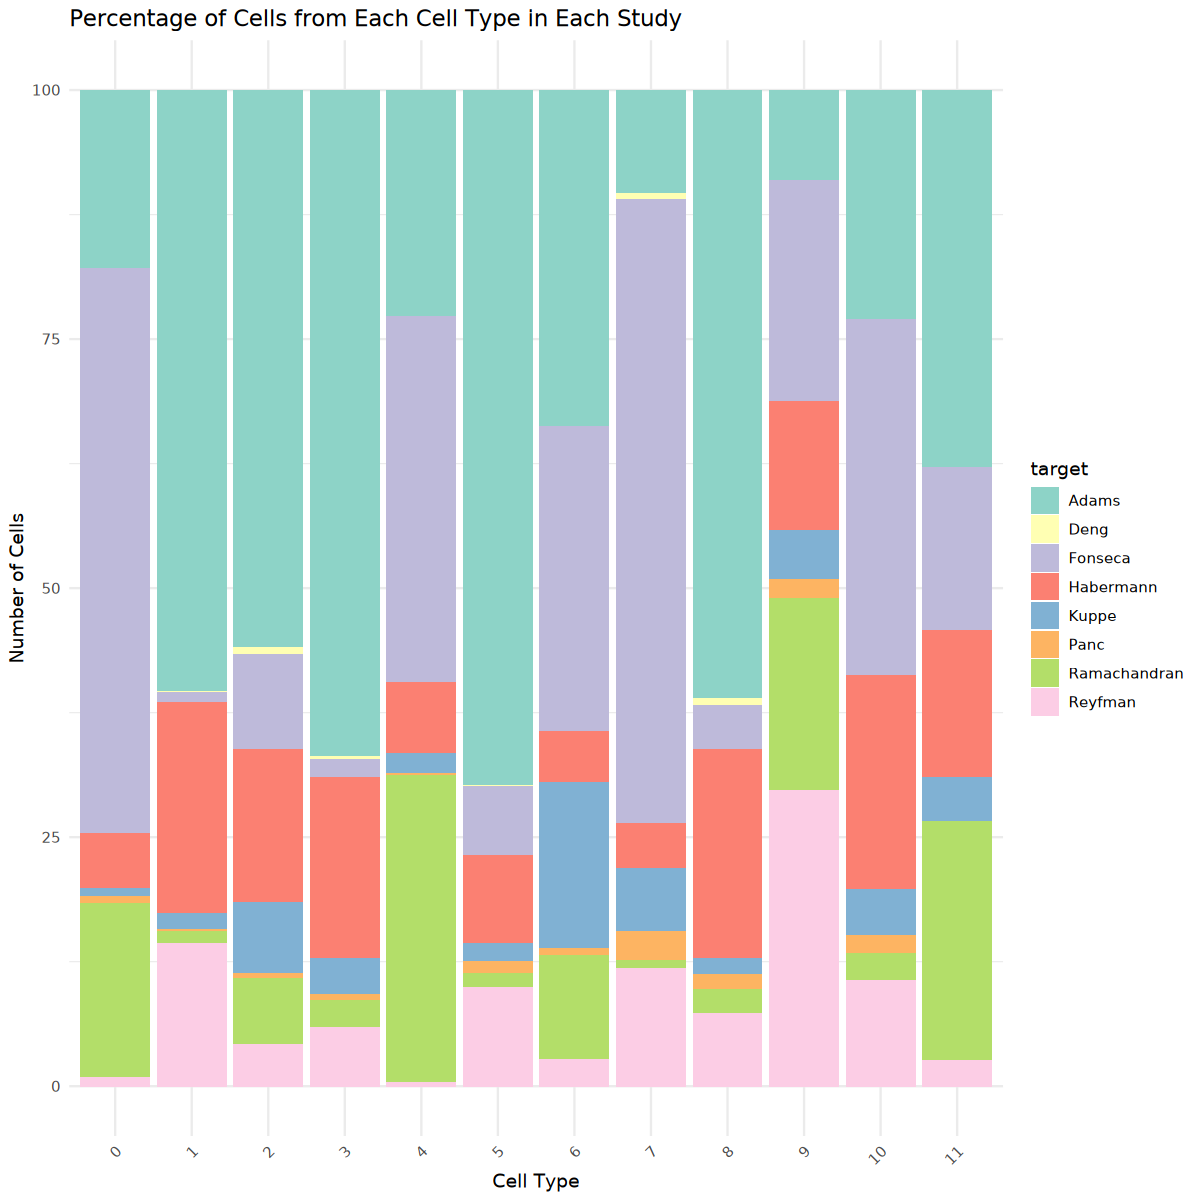

In [16]:
#Barplot of percentage
# Calculate the total number of cells in each dataset
contingency_table_long <- contingency_table_long %>%
  group_by(source) %>%
  mutate(Total = sum(value)) %>%
  ungroup()

# Calculate the percentage
contingency_table_long <- contingency_table_long %>%
  mutate(Percentage = (value / Total) * 100)
options(repr.plot.width=10, repr.plot.height=10)
ggplot(contingency_table_long, aes(x = source, y = Percentage, fill = target)) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Cells from Each Cell Type in Each Study",
       x = "Cell Type",
       y = "Number of Cells") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") + RotatedAxis()

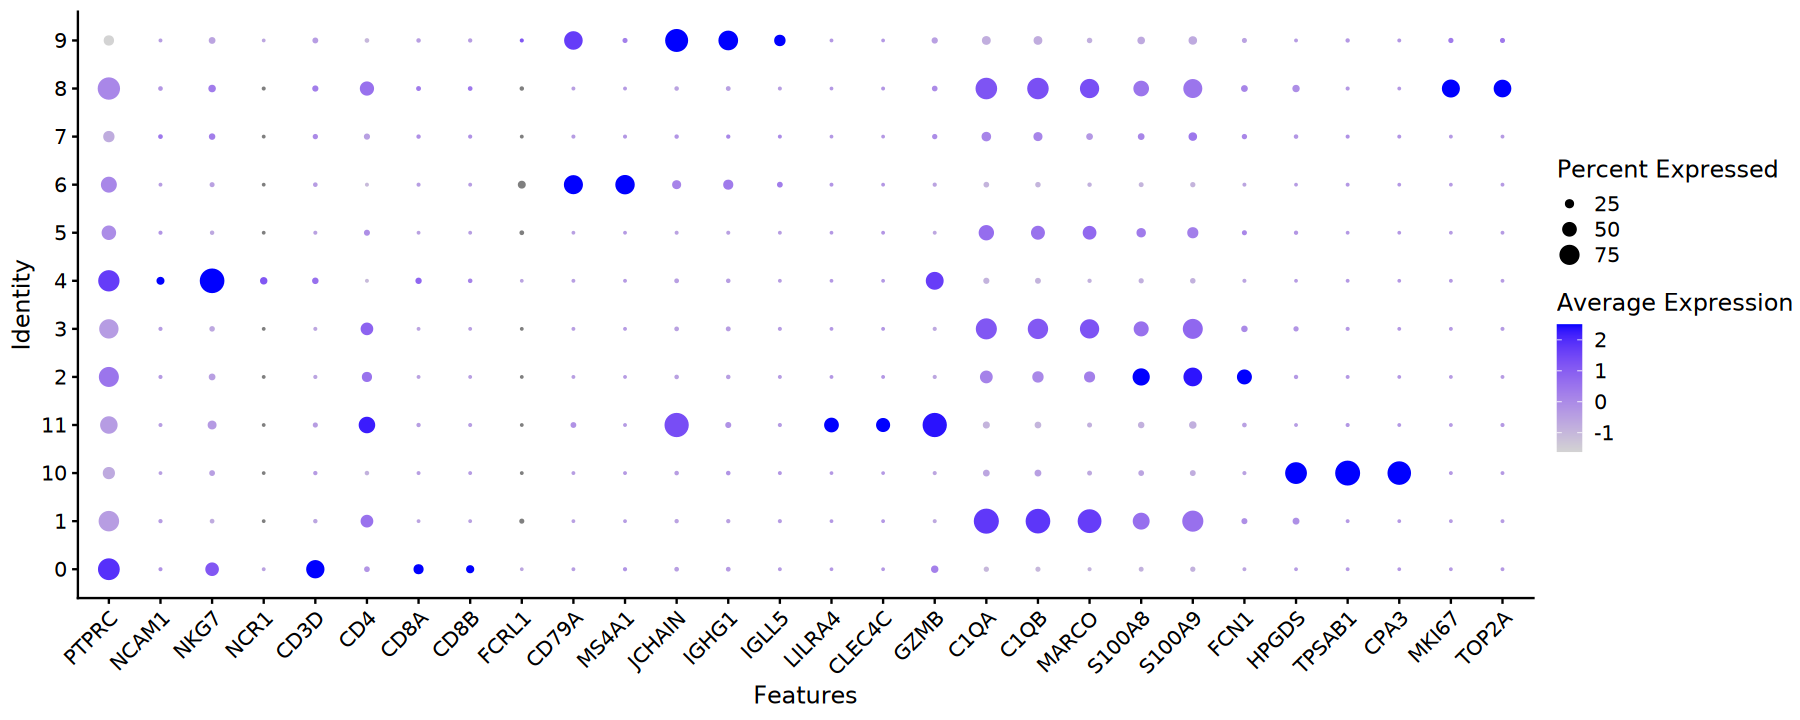

In [30]:
#Dotplotting
features <- c(  "PTPRC", "NCAM1", "NKG7", "NCR1", "CD3D", "CD4","CD8A", "CD8B", 
                 "FCRL1", "CD79A", "MS4A1", "JCHAIN", "IGHG1", "IGLL5",
                "LILRA4", "CLEC4C", "GZMB", "C1QA", "C1QB", "MARCO", "S100A8", "S100A9", "FCN1",
                "HPGDS", "TPSAB1", "CPA3",
               "MKI67", "TOP2A"
             ) 
options(repr.plot.width=15, repr.plot.height=6)
DotPlot(data_merged_imm, features = features, group.by = "RNA_snn_res.0.2") + RotatedAxis()

In [15]:
#Need to join layers before downstream analysis
data_merged_imm <- JoinLayers(data_merged_imm)

In [16]:
#Subsetting out cluster 7 
data_merged_imm@active.ident <- as.factor(data_merged_imm$`RNA_snn_res.0.2`)
data_merged_imm_clean <- subset(data_merged_imm, idents = 7, invert = TRUE)

Warning message:
“Removing 9915 cells missing data for vars requested”


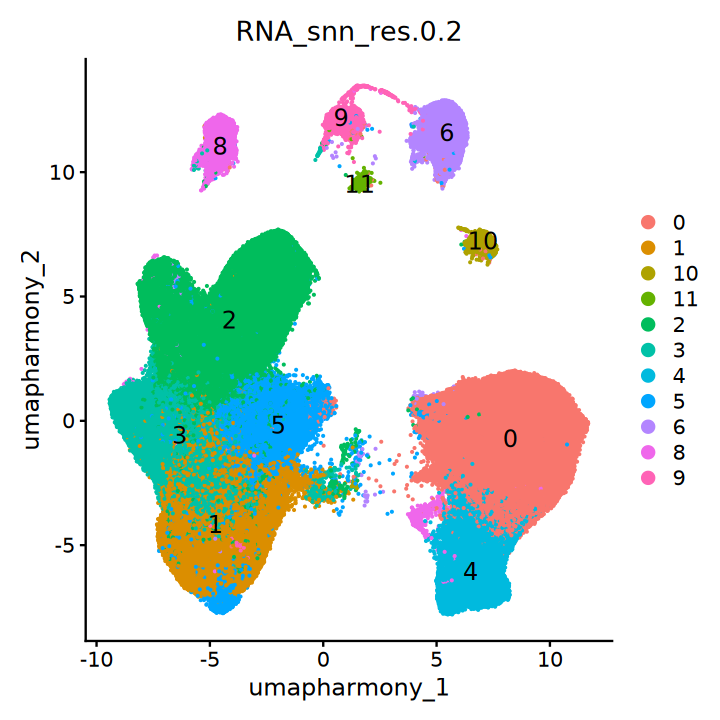

In [25]:
#An error occurs after subsetting, solution follows
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(data_merged_imm_clean, reduction = "umap.harmony", group.by = "RNA_snn_res.0.2", label = TRUE, pt.size = 0.1, label.size = 5, raster = FALSE)

In [17]:
#Removing the data and scale.data layers
#Getting counts layer and adding it back into the object
data_merged_imm_clean@assays$RNA@layers$data = NULL
data_merged_imm_clean@assays$RNA@layers$scale.data = NULL
counts = GetAssayData(data_merged_imm_clean, assay = "RNA", layer = "counts")
data_merged_imm_clean[["RNA"]] = CreateAssay5Object(counts = counts)

Warning message:
“Different cells and/or features from existing assay RNA”


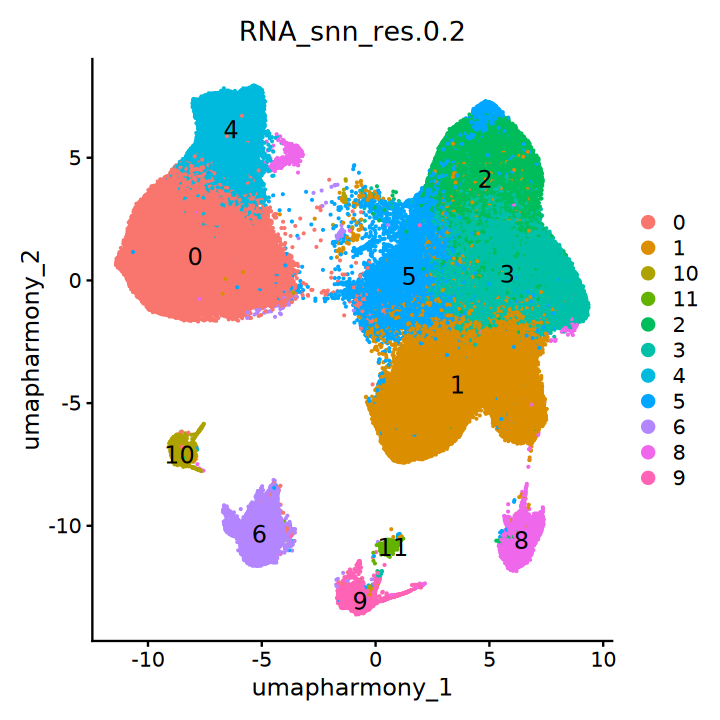

In [18]:
#Is error still there?
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(data_merged_imm_clean, reduction = "umap.harmony", group.by = "RNA_snn_res.0.2", label = TRUE, pt.size = 0.1, label.size = 5, raster = FALSE)

Normalizing layer: counts.Adams

Normalizing layer: counts.Habermann

Normalizing layer: counts.Reyfman

Normalizing layer: counts.Ramachandran

Normalizing layer: counts.Fonseca

Normalizing layer: counts.Kuppe

Normalizing layer: counts.Liebig

Normalizing layer: counts.Tosti

Normalizing layer: counts.Deng

Finding variable features for layer counts.Adams

Finding variable features for layer counts.Habermann

Finding variable features for layer counts.Reyfman

Finding variable features for layer counts.Ramachandran

Finding variable features for layer counts.Fonseca

Finding variable features for layer counts.Kuppe

Finding variable features for layer counts.Liebig

Finding variable features for layer counts.Tosti

Finding variable features for layer counts.Deng

Centering and scaling data matrix

PC_ 1 
Positive:  CCL5, IL32, CD69, GZMA, NKG7, CD3D, CD2, CST7, CD3E, KLRB1 
	   TRBC2, CD7, ETS1, CXCR4, TRAC, TRBC1, ISG20, CD247, GZMM, CTSW 
	   GZMK, RUNX3, CCL4, FYN, CD96, SYNE2, L

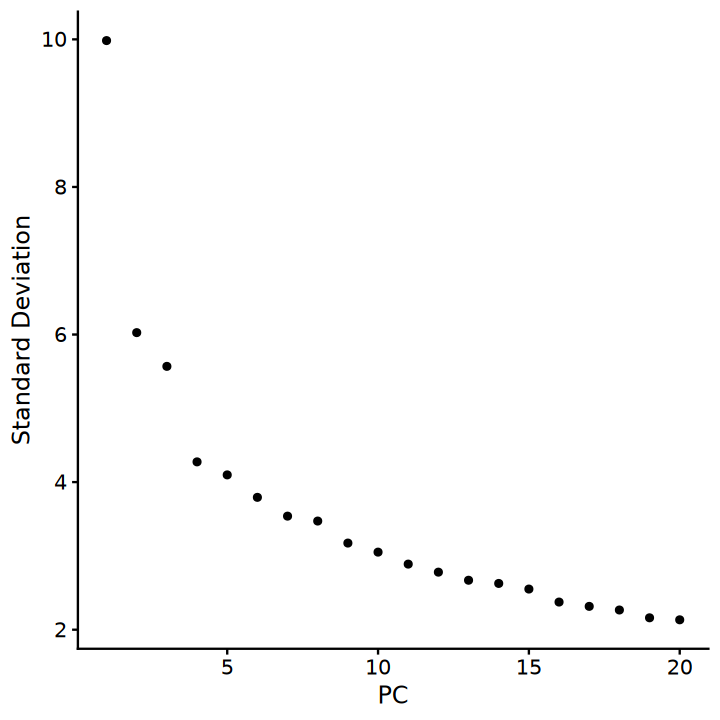

In [19]:
#Test RunUMAP with a fresh integration
#Useful to find new clusters as smaller differences in gene expression across these cells are taken into account via re-integration preprocessing steps
options(future.globals.maxSize = 8000 * 1024^2)
data_merged_imm_clean[["RNA"]] <- split(data_merged_imm_clean[["RNA"]], f = data_merged_imm_clean$study)
data_merged_imm_clean <- NormalizeData(data_merged_imm_clean)
data_merged_imm_clean <- FindVariableFeatures(data_merged_imm_clean)
data_merged_imm_clean <- ScaleData(data_merged_imm_clean)
data_merged_imm_clean <- RunPCA(data_merged_imm_clean)
ElbowPlot(data_merged_imm_clean)

In [ ]:
data_merged_imm_clean

In [20]:
#Harmony integration - timed
start.time <- Sys.time()


data_merged_imm_clean <- RunHarmony(data_merged_imm_clean, 
                        group.by.vars = "study",
                        reduction = "pca",
                        verbose = TRUE,
                        reduction.save = "harmony",
                        assay.use = "RNA")

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 22876600)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations



Time difference of 9.56 mins

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 457532
Number of edges: 11263839

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9458
Number of communities: 13
Elapsed time: 340 seconds


1 singletons identified. 12 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 457532
Number of edges: 11263839

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 23
Elapsed time: 333 seconds


1 singletons identified. 22 final clusters.

21:52:39 UMAP embedding parameters a = 0.9922 b = 1.112

21:52:39 Read 457532 rows and found 15 numeric columns

21:52:39 Using Annoy for neighbor search, n_neighbors = 30

21:52:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:53:24 Writing NN index file to temp file /tmp/RtmpleVjCn/file1cb3631b7d0dc4

21:53:25 Searching Annoy index using 1 thread, search_k = 3000

21:56:35 Annoy recall = 100%

21:56:36 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:56:57 Initializing from normalized Laplacian + noise (using RSpectra)

21:57:48 Commencing optimization for 200 epochs, with 19769602 positive edges

22:02:30 Optimization finished

Rasterizing points since number of points excee

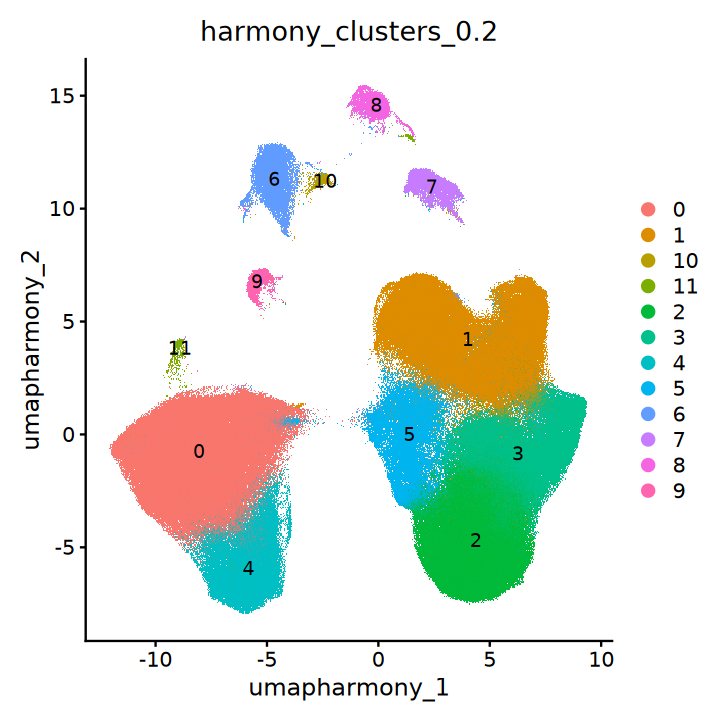

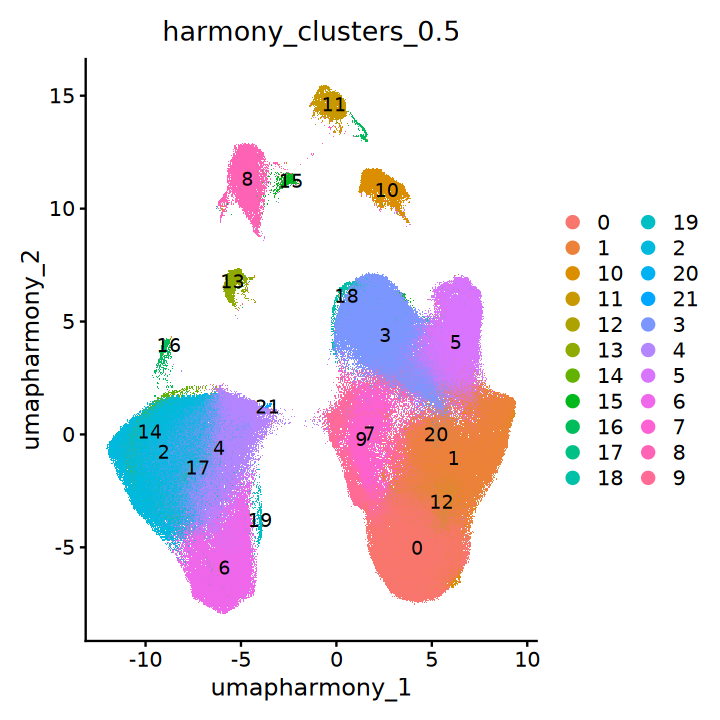

In [21]:
data_merged_imm_clean <- FindNeighbors(data_merged_imm_clean, reduction = "harmony", dims = 1:20)
data_merged_imm_clean <- FindClusters(data_merged_imm_clean, resolution = 0.2, cluster.name = "harmony_clusters_0.2")
data_merged_imm_clean <- FindClusters(data_merged_imm_clean, resolution = 0.5, cluster.name = "harmony_clusters_0.5")
data_merged_imm_clean <- RunUMAP(data_merged_imm_clean, reduction = "harmony", dims = 1:15, reduction.name = "umap.harmony")

options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_imm_clean, label = T, group.by = "harmony_clusters_0.2")
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_imm_clean, label = T, group.by = "harmony_clusters_0.5")

In [33]:
table(data_merged_imm_clean$`harmony_clusters_0.2`, data_merged_imm_clean$study)

    
     Adams  Deng Fonseca Habermann Kuppe  Panc Ramachandran Reyfman
  0  20214     0   65198      6279  1078   972        19986    1042
  1  63123    34    1557     22689  1128   143          548   16193
  10   458     7     196       176    53     1          293      31
  2  54304   725    9399     15397  6819   404         6435    3910
  3  36481   173    1298      9459  2858   384         2472    2802
  4   7975     0   12772      2403   733    50        10701     115
  5   5614     6    5083       841  2646    97         1723     443
  6  13335     7     773       571   252   194          193     809
  7   4880    57     324      1755   127   122          189     588
  8    418     0    1042       606   217    83          897    1381
  9    736     3    1145       684   148    58           87     333

In [6]:
table(data_merged_imm_clean$`harmony_clusters_0.5`, data_merged_imm_clean$study)

    
     Adams  Deng Fonseca Habermann Kuppe Liebig Ramachandran Reyfman Tosti
  0  44170    19     306     13695   815     98          531   12245    65
  1  49557    88     790     13948   935    119          884    3911    78
  2  15451     0   34033      3776   508    199        13648     918   363
  3  30331   238    4708      8482  3625     90         3668    2078   158
  4   4215     0   30370      2236   748     59         4431     762   279
  5  20417   481    3870      5835  3437     76         2850    1609    68
  6   8334     0   11899      2651   728     17        10842     141    37
  7   9316    24    1508      4679   525     50          326    2161    44
  8   5587    12    5083       850  2351     46         1723     446    60
  9  11879    10    1137       548   198     76          200     554   126
  10  5754    60     289      1637   114     84          190     624    35
  11   340     0    1073       461   260     13          871    1244    68
  12   305    56    

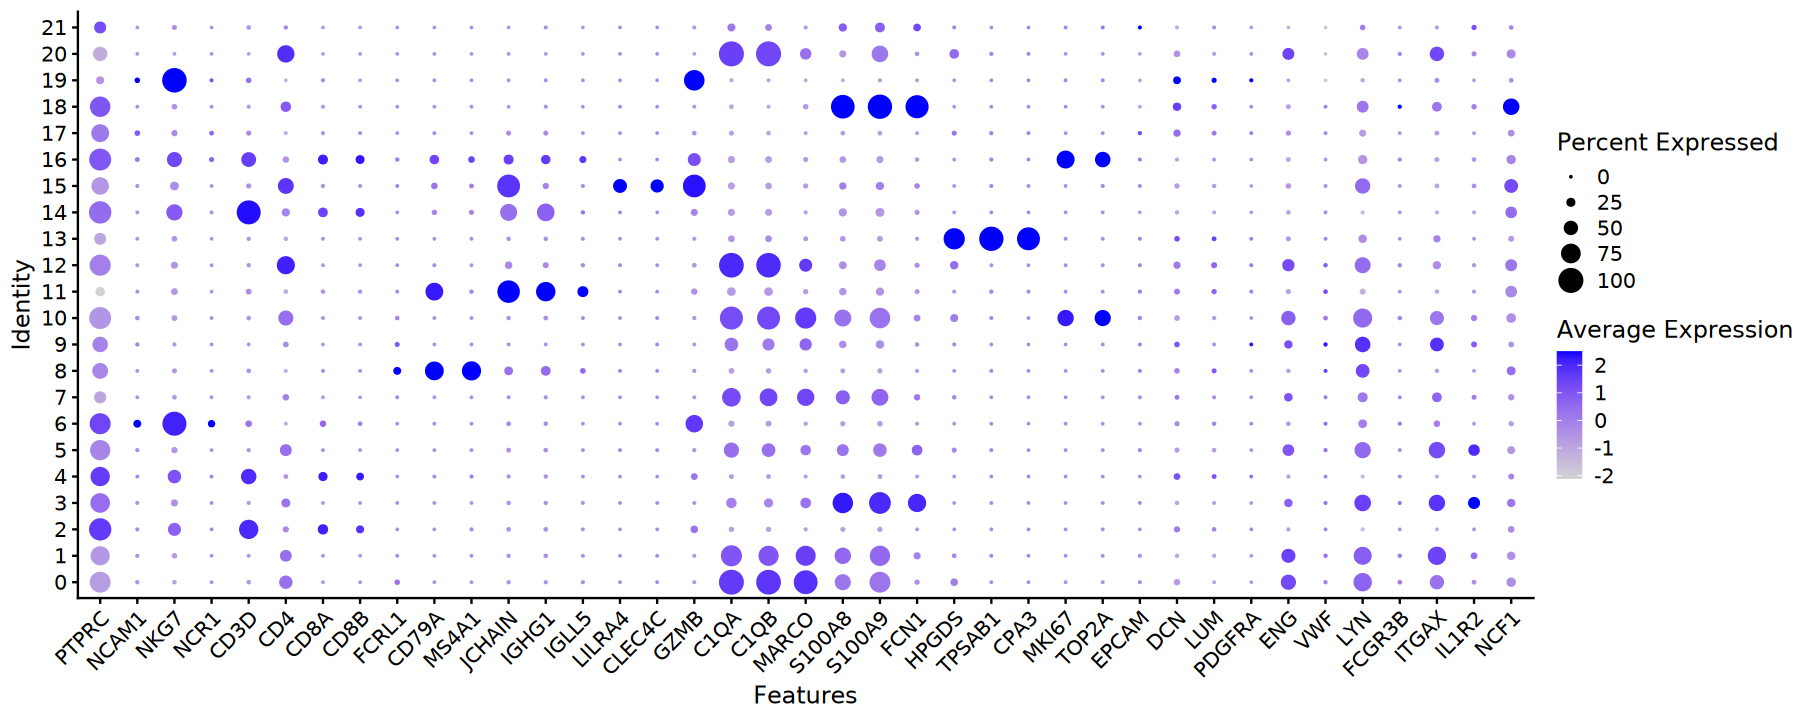

In [8]:
#Dotplotting
features <- c(  "PTPRC", "NCAM1", "NKG7", "NCR1", "CD3D", "CD4","CD8A", "CD8B", 
                 "FCRL1", "CD79A", "MS4A1", "JCHAIN", "IGHG1", "IGLL5",
                "LILRA4", "CLEC4C", "GZMB", "C1QA", "C1QB", "MARCO", "S100A8", "S100A9", "FCN1",
                "HPGDS", "TPSAB1", "CPA3",
               "MKI67", "TOP2A", "EPCAM", "DCN", "LUM", "PDGFRA", "ENG", "VWF", "LYN", "FCGR3B", "ITGAX", "IL1R2", "NCF1"
             ) 
options(repr.plot.width=15, repr.plot.height=6)
DotPlot(data_merged_imm_clean, features = features, group.by = "harmony_clusters_0.5") + RotatedAxis()

In [10]:
#Rearrange cells order
#Check the current levels of cell_identity
levels(data_merged_imm_clean$`harmony_clusters_0.5`)

# Define the desired order of factor levels
desired_order <- c("0", "1", "2", "3", "4", "5", "6", "7",
                   "8", "9", "10", "11", "12", "13", "14",
                   "15", "16", "17", "18",  "19", "20", "21")

# Reorder the factor levels
data_merged_imm_clean$`harmony_clusters_0.5` <- factor(data_merged_imm_clean$`harmony_clusters_0.5`, levels = desired_order)

# Check if the factor levels have been reordered
levels(data_merged_imm_clean$`harmony_clusters_0.5`)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21"

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



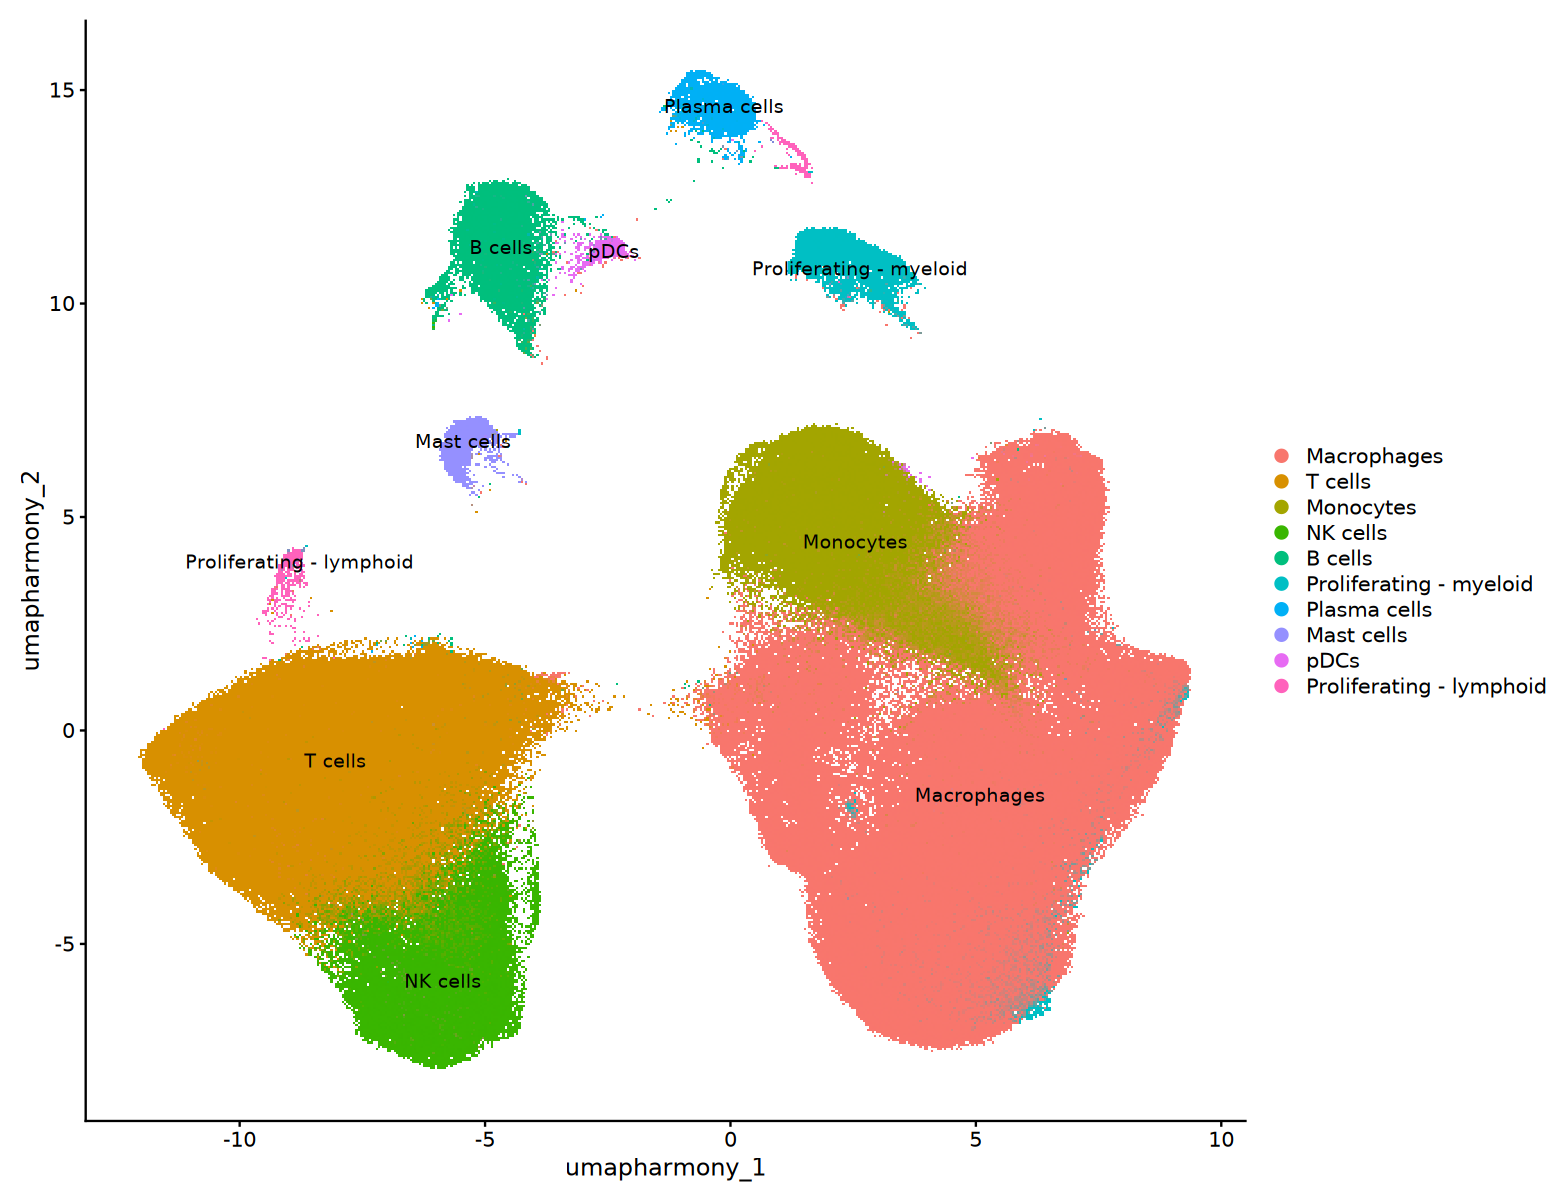

In [11]:
#Assigning new names
data_merged_imm_clean$cells <- NULL
data_merged_imm_clean@active.ident <- factor(data_merged_imm_clean$`harmony_clusters_0.5`)

cluster.ids.new <- c("Macrophages", "Macrophages", "T cells", "Monocytes", "T cells", "Macrophages",
                     "NK cells", "Macrophages", "B cells", "Macrophages", "Proliferating - myeloid", "Plasma cells", 
                     "Macrophages", "Mast cells", "T cells", "pDCs", "Proliferating - lymphoid", 
                     "T cells", "Monocytes", "NK cells", "Macrophages", "Macrophages"


)

names(cluster.ids.new) <- levels(data_merged_imm_clean)
data_merged_imm_clean <- RenameIdents(data_merged_imm_clean, cluster.ids.new)
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(data_merged_imm_clean, reduction = "umap.harmony", label = TRUE)
data_merged_imm_clean$cells <- data_merged_imm_clean@active.ident

In [25]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_imm")
save(data_merged_imm_clean, file = "data_merged_imm_finalsubset_ann.RData")

In [9]:
cellytpe_colors <- c(
    "Macrophages" = "#096192",
    "Proliferating - myeloid" = "#3d005b",
    "Monocytes" = "#1399c6",
    "Mast cells" = "#879eb0",
    "pDCs" = "#4d5d53",
     "Proliferating - lymphoid" = "#b192ee",
    "B cells" = "#beccc0",
    "Plasma cells" = "#7e9278",
    "T cells" = "#1d817e",
    "NK cells" = "#56beba"
)

In [ ]:
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(data_merged_imm_clean, reduction = "umap.harmony", cols = cellytpe_colors, group.by = "cells", label = TRUE, raster = FALSE, pt.size = 0.1, label.size = 6, repel = FALSE)

In [14]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Figures")
p <- DimPlot(data_merged_imm_clean, reduction = "umap.harmony", cols = cellytpe_colors, group.by = "cells", label = TRUE, raster = FALSE, pt.size = 0.1, label.size = 5, repel = TRUE)
ggsave("data_merged_imm_umap_celltype.png", plot = p, width = 13, height = 10)

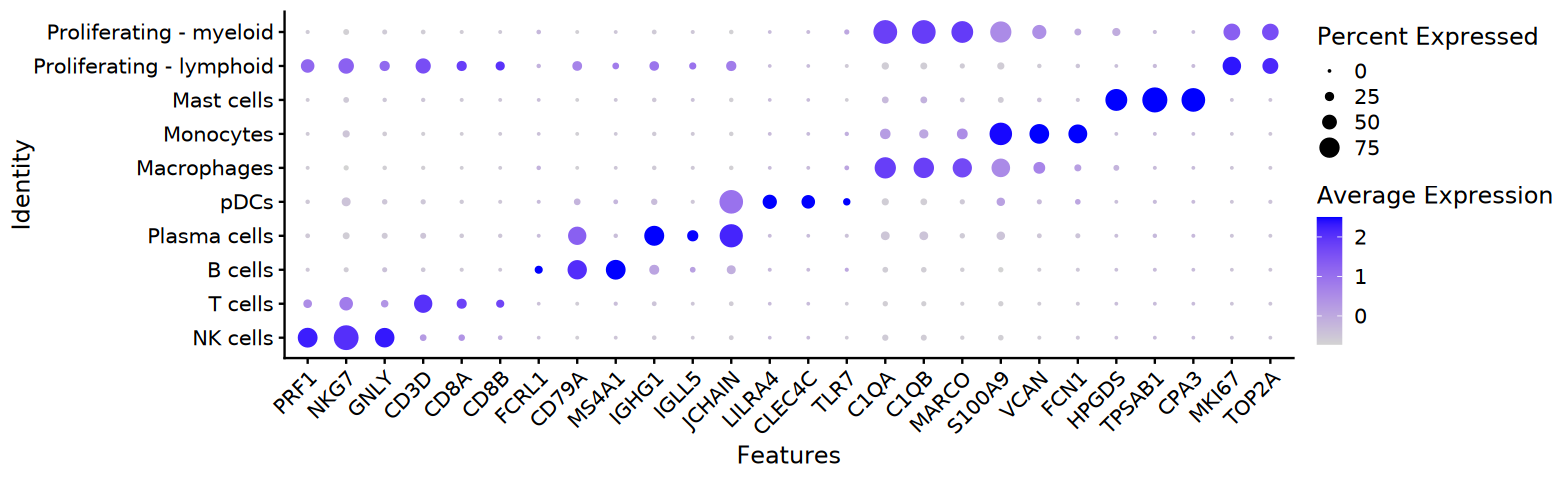

In [18]:
#Dotplotting for thesis
data_merged_imm_clean@active.ident <- factor(data_merged_imm_clean$cells)
data_merged_imm_clean$cells <- factor(data_merged_imm_clean$cells, levels = c(
                                                             'NK cells', 'T cells',
                                                             'B cells', 'Plasma cells', 'pDCs', 
                                                             'Macrophages', 'Monocytes',  
                                                             'Mast cells',
                                                             'Proliferating - lymphoid',
                                                            'Proliferating - myeloid'
                                                           ))
data_merged_imm_clean@active.ident <- data_merged_imm_clean$cells

features <- c( "PRF1", "NKG7", "GNLY", "CD3D", "CD8A", "CD8B", 
               "FCRL1", "CD79A", "MS4A1", "IGHG1", "IGLL5", "JCHAIN", "LILRA4", "CLEC4C", "TLR7",
              "C1QA", "C1QB", "MARCO", "S100A9", "VCAN", "FCN1", 
              "HPGDS", "TPSAB1", "CPA3", "MKI67", "TOP2A"
             ) 
options(repr.plot.width=13, repr.plot.height=4)
DotPlot(data_merged_imm_clean, features = features, group.by = "cells") + RotatedAxis()

In [19]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Figures")
p <- DotPlot(data_merged_imm_clean, features = features, group.by = "cells") + RotatedAxis()
ggsave("data_merged_imm_dotplot_celltype.png", plot = p, width = 13, height = 5)

In [24]:
#Combining Liebig and Tosti under one slot
data_merged_imm_clean$study <- as.character(data_merged_imm_clean$study)
data_merged_imm_clean$study <- 
ifelse(data_merged_imm_clean$study %in% c("Liebig", "Tosti"), "Panc", data_merged_imm_clean$study)
data_merged_imm_clean$study <- as.factor(data_merged_imm_clean$study)
unique(data_merged_imm_clean$study)

[1] Adams        Habermann    Reyfman      Ramachandran Fonseca     
[6] Kuppe        Panc         Deng        
Levels: Adams Deng Fonseca Habermann Kuppe Panc Ramachandran Reyfman

In [62]:
data_merged_imm_clean$cells <- as.factor(data_merged_imm_clean$cells)

In [ ]:
#Barplotting cell types accross datasets

In [21]:
#Barplotting + Sankey plotting (if needed)
library(networkD3)
contingency_table <- table(data_merged_imm_clean$cells, data_merged_imm_clean$study)
contingency_table <- as.data.frame.matrix(contingency_table)
contingency_table$source <- rownames(contingency_table)
rownames(contingency_table) <- NULL
contingency_table$source <- factor(contingency_table$source, levels = sort(unique(contingency_table$source)))
library(reshape2)  #Make sure the reshape2 package is installed
contingency_table_long <- melt(contingency_table, id.vars = "source", variable.name = "target", value.name = "value")
nodes <- unique(c(as.character(contingency_table_long$source), as.character(contingency_table_long$target)))
nodes_df <- data.frame(name = nodes)
contingency_table_long$sourceID <- match(contingency_table_long$source, nodes_df$name) - 1
contingency_table_long$targetID <- match(contingency_table_long$target, nodes_df$name) - 1
contingency_table_long <- contingency_table_long[contingency_table_long$value > 10, ] 



Attaching package: ‘networkD3’


The following object is masked from ‘package:Seurat’:

    JS


The following object is masked from ‘package:SeuratObject’:

    JS




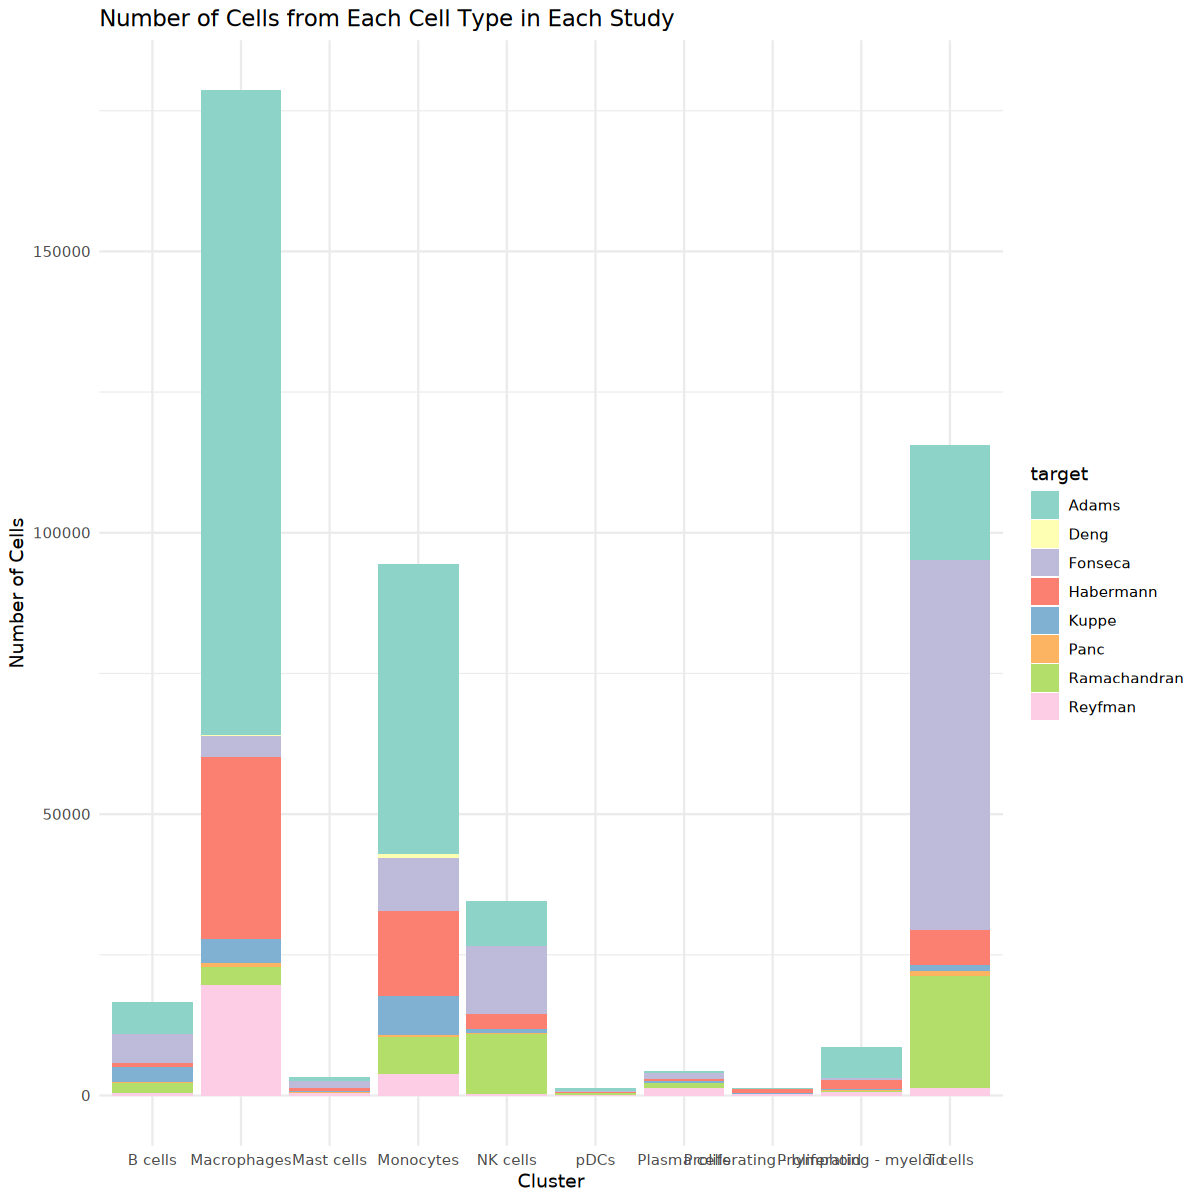

In [80]:
ggplot(contingency_table_long, aes(x = source, y = value, fill = target)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Cells from Each Cell Type in Each Study",
       x = "Cluster",
       y = "Number of Cells", sort = F) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

In [22]:
#Calculate the total number of cells in each dataset
contingency_table_long <- contingency_table_long %>%
  group_by(source) %>%
  mutate(Total = sum(value)) %>%
  ungroup()

#Calculate the percentage
contingency_table_long <- contingency_table_long %>%
  mutate(Percentage = (value / Total) * 100)

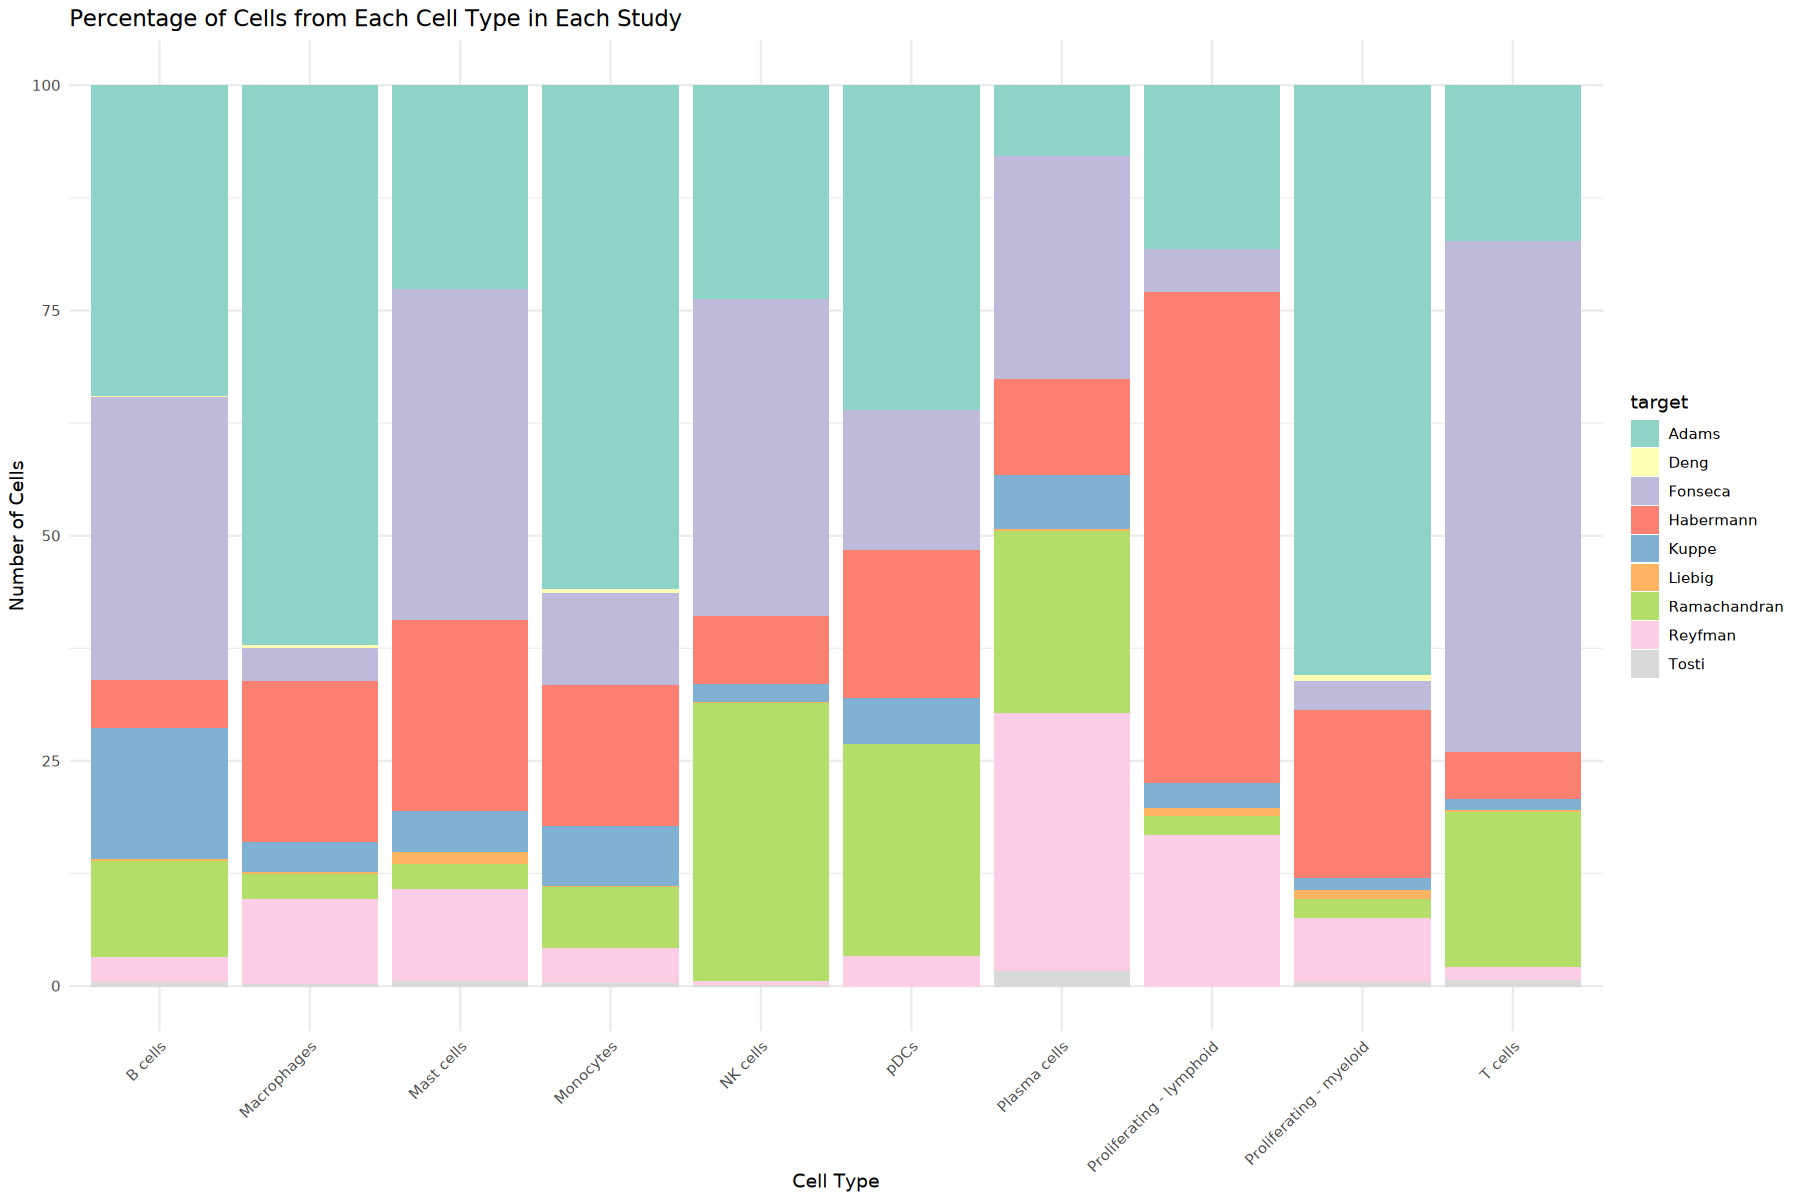

In [23]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(contingency_table_long, aes(x = source, y = Percentage, fill = target)) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Cells from Each Cell Type in Each Study",
       x = "Cell Type",
       y = "Number of Cells") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") + RotatedAxis()